In [29]:
import os
#os.environ["WANDB_ENTITY"] = "mlclass"

In [30]:
import keras
import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
import matplotlib.pyplot as plt

In [31]:
import glob
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

def load_and_process_images(folder_path, label):
    images = []
    labels = []

    # Use glob to get all PNG files in the specified folder
    image_paths = glob.glob(f"{folder_path}/*.png")

    for path in image_paths:
        img = Image.open(path)
        img_array = np.array(img)

        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

# Example usage
# Specify the paths to the train and test folders
train_folder = 'D:/SMALL_IMAGES_CNN/train'
test_folder = 'D:/SMALL_IMAGES_CNN/test'

# Load and process training images
x_train_class1, y_train_class1 = load_and_process_images(f'{train_folder}/positive', label=1)
x_train_class2, y_train_class2 = load_and_process_images(f'{train_folder}/negative', label=0)

# Load and process testing images
x_test_class1, y_test_class1 = load_and_process_images(f'{test_folder}/positive', label=1)
x_test_class2, y_test_class2 = load_and_process_images(f'{test_folder}/negative', label=0)

# Concatenate the arrays for each class
x_train = np.concatenate([x_train_class1, x_train_class2], axis=0)
y_train_raw = np.concatenate([y_train_class1, y_train_class2], axis=0)
x_test = np.concatenate([x_test_class1, x_test_class2], axis=0)
y_test_raw = np.concatenate([y_test_class1, y_test_class2], axis=0)

# Assuming you have class names as a list
class_names = ['negative','positive']


## Porque tem essa dimenção as minhas imagens ?

In [9]:
x_train[0,:,:,:].shape

(194, 194, 4)

In [24]:
x_train[0,:,:,3]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

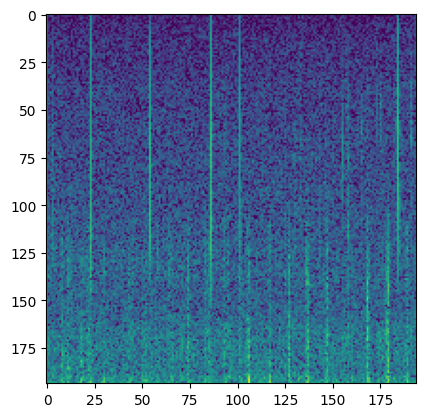

In [8]:
plt.imshow(x_train[0,:,:,2].astype(int))

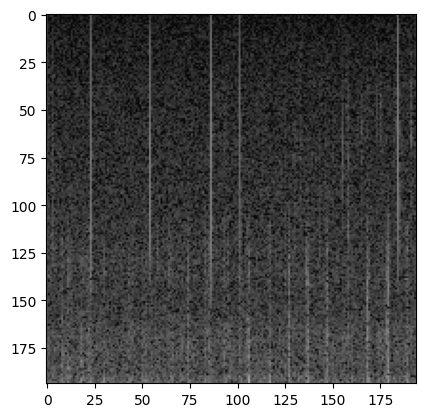

In [3]:
import matplotlib.pyplot as plt
# take a look at the kinds of images we're dealing with
plt.imshow(x_train[0,:,:,:].astype(int))

# Com isso reparei que na minha array de 4Dimensões eu tinha as tres primeiras dimensões com os mesmos valores de pixels
# Logo se eu retirar elas vai ficar tudo bem, a quarta dimensão são apenas valores 255 correspondente ao máximo de cor de transparencia. Deve ter sido quando eu salvei as imagens

In [32]:
# Valores que preciso alterar para trabalhar com grey scale
#Todas imagens e todos os pixels só na primeira dimensão 
x_test = x_test[:,:,:,0]
x_train = x_train[:,:,:,0]



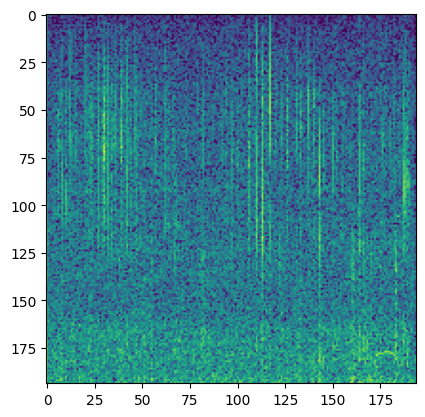

In [23]:
# take a look at the kinds of images we're dealing with
plt.imshow(x_train[100].astype(int))

In [24]:
# Print out the classes we need to target
class_names

['negative', 'positive']

(array([105.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

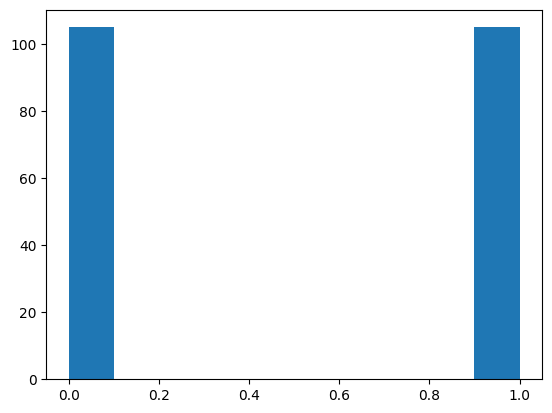

In [25]:
# check how balanced our class distribution is
plt.hist(y_train_raw)

In [33]:
# One hot encode ouput
y_train = keras.utils.to_categorical(y_train_raw)
y_test = keras.utils.to_categorical(y_test_raw)

In [34]:
# We build an extremely simple perceptron to try to fit our data

x_train_normalized = x_train / 255.
x_test_normalized = x_test / 255.

very_simple_model=Sequential()
very_simple_model.add(Flatten())
very_simple_model.add(Dense(25, activation="sigmoid"))
very_simple_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

wandb.init(project="First_Test_MyData")
very_simple_model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test), callbacks=[WandbCallback()])